In [50]:
#Vamos a importar las librerías que vamos a necesitar
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

In [51]:
#De acuerdo con lo solicitado tenemos


# 1. Lectura de datos

In [52]:
#1.A. Lectura de datos del CSV y cargarlo en un Data Frame
data_rama = pd.read_csv(r'D:\PYTHON\DIPLOMADO\MÓDULO 1\Modulo_3\Reto4\rama_2023_05_missing_outliers_limited.csv')

In [53]:
#Lo leemos
data_rama

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,NaN,21.170139,2.735683
3069,2023-05-28,0.286826,NaN,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [54]:
#1.B. Mostrar las primeras filas del Data Frame para entender la estructura de los datos
data_rama.head()
#Se observa que se tienen datos de calidad del aire

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [55]:
#1.B. Le aplicamos un describe para ver de mejor manera los datos 
data_rama.describe()
#Se observa que tenemos datos nulos en la mayoría de variables


,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,2916.000000,2918.000000,2916.000000,2931.000000,2916.000000,2931.000000,2928.000000,2936.000000
mean,0.546324,16.865058,22.964047,38.081554,30.462022,47.145281,23.809324,4.255579
std,1.547938,52.445837,6.738178,14.808493,8.996061,128.824262,62.176052,13.793875
min,0.115917,1.168000,8.061630,9.983402,3.226054,8.218487,2.849315,0.630435
25%,0.328456,8.071004,18.149000,27.008633,23.912015,29.542437,15.307906,1.562846
50%,0.446299,12.719253,22.364633,35.902381,29.850776,40.131720,20.526173,2.514104
75%,0.601357,19.396523,26.779887,46.770094,36.147095,52.910175,26.207407,4.390534
max,43.237677,1423.223082,72.193452,148.005952,67.443750,4055.391025,1868.719929,355.378067


# 2. Gráfico de las variables

In [56]:
#2. A. GRAFICA LAS SERIES DE TIEMPO DE CADA VARIABLE PARA VISUALIZAR LOS DATOS A LO LARGO DEL TIEMPO
#Checamos la matriz de distribución de los datos
#msno.matrix(data_rama)

In [57]:
#2. A. Ahora realizamos la gráfica de series de tiempo
#Se observa que aún no lee los datos de fecha, por lo tanto lo convertimos a uno que Python pueda leer
data_rama['fecha'] = pd.to_datetime(data_rama['fecha'], format='%Y-%m-%d', errors='coerce') #Aquí el formato deb ser igual a la priemr columna 
# Verificar si hay fechas que no se pudieron convertir
invalid_dates = data_rama[data_rama['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)


In [58]:
# Formatear la columna 'Fecha' al formato 'YYYY-MM-DD'
#data_rama['fecha'] = data_rama['fecha'].dt.strftime('%Y-%m-%d')

In [59]:
#Le digo a Pandas que la fecha será la variable de ordenamiento
data_rama.set_index('fecha', inplace=True)

In [60]:
data_rama.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


<Axes: xlabel='fecha'>

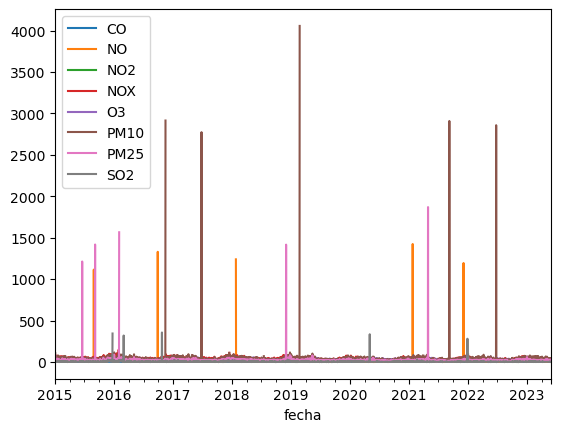

In [61]:
data_rama.plot()

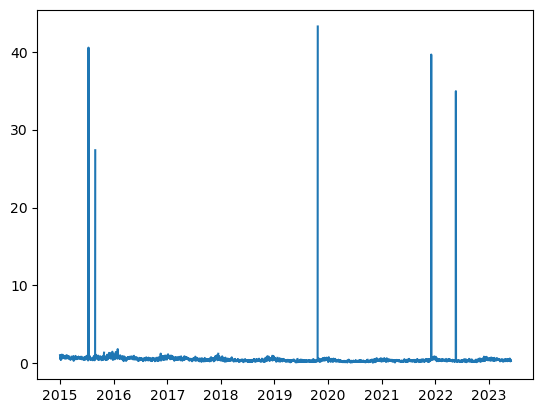

In [62]:
#2.A. GRAFICAMOS CO
plt.plot(data_rama.index, data_rama['CO' ])
#2.B. SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2015,2019,2021,2022), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA


<Axes: >

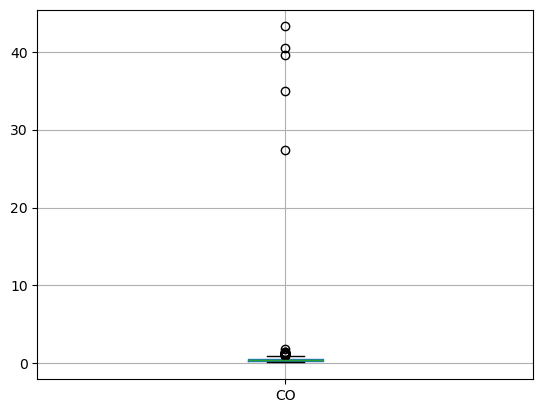

In [63]:
#2.B
data_rama.boxplot(column='CO')

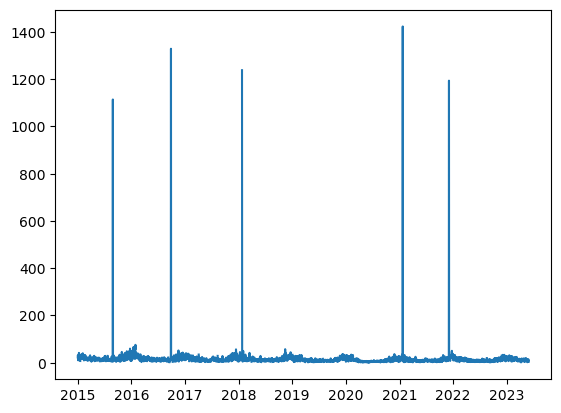

In [64]:
#2. A. GRAFICAMOS NO
plt.plot(data_rama.index, data_rama['NO' ])
#2.B. SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2015,2016,2018,2021), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA

<Axes: >

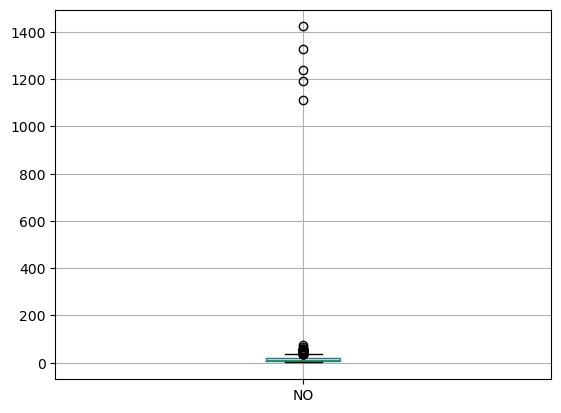

In [65]:
#2.B
data_rama.boxplot(column='NO')

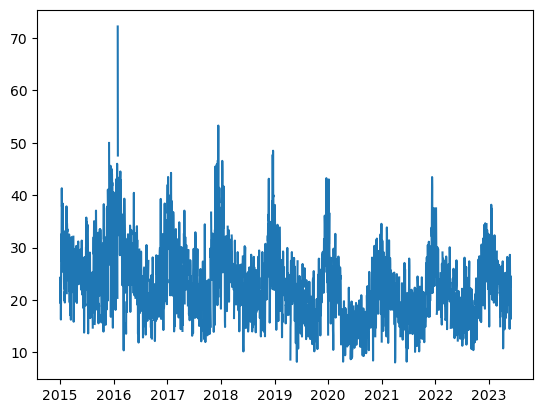

In [66]:
#2. A. GRAFICAMOS NO2
plt.plot(data_rama.index, data_rama['NO2' ])
#2.B. DATOS ATÍPICOS
#SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2016), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA

<Axes: >

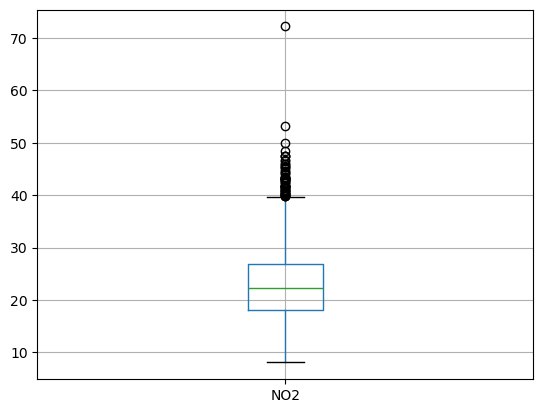

In [67]:
#2.B
data_rama.boxplot(column='NO2')

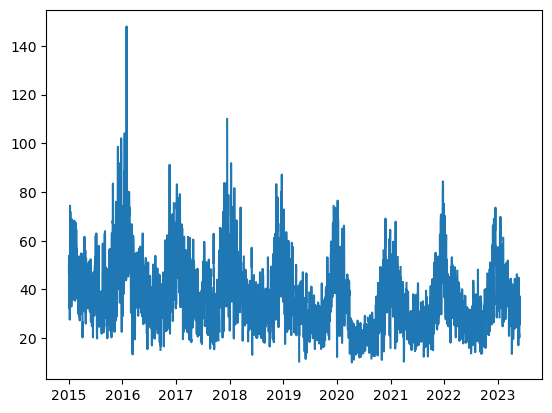

In [68]:
#2. A. GRAFICAMOS NOX
plt.plot(data_rama.index, data_rama['NOX' ])
    #2.B. SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2016), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA

<Axes: >

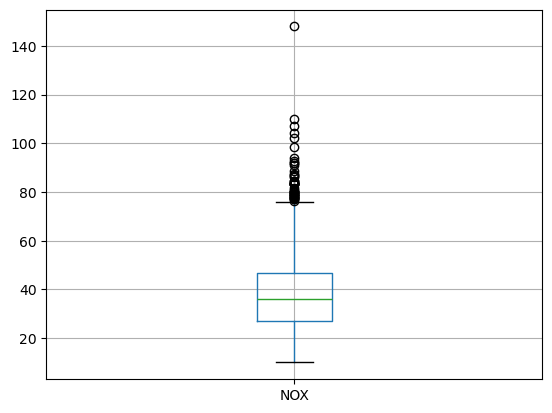

In [69]:
#2.B
data_rama.boxplot(column='NOX')

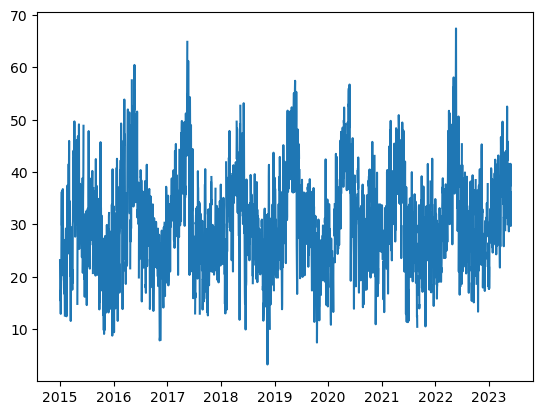

In [70]:
#2. A. GRAFICAMOS O3
plt.plot(data_rama.index, data_rama['O3' ])
#2.B.SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2016, 2017, 2022), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIANO SE OBSERVAN DATOS ATÍPICOS

<Axes: >

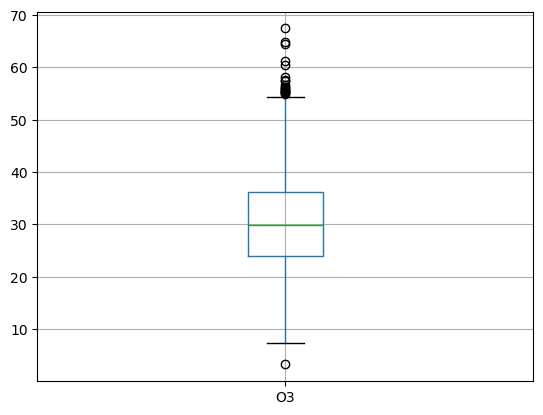

In [71]:
#2.B
data_rama.boxplot(column='O3')

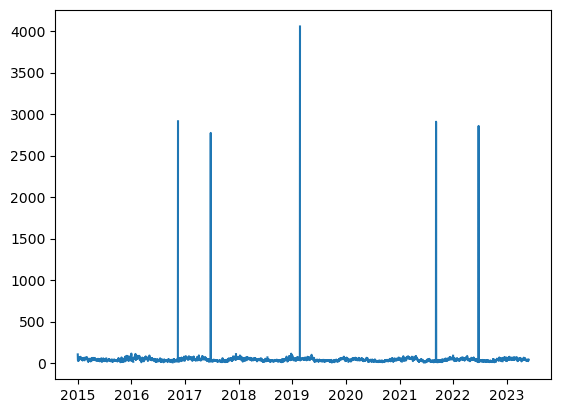

In [72]:
#2. A. GRAFICAMOS PM10
plt.plot(data_rama.index, data_rama['PM10' ])
#2.B. SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2016,2017,2019,2021,2022), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA

<Axes: >

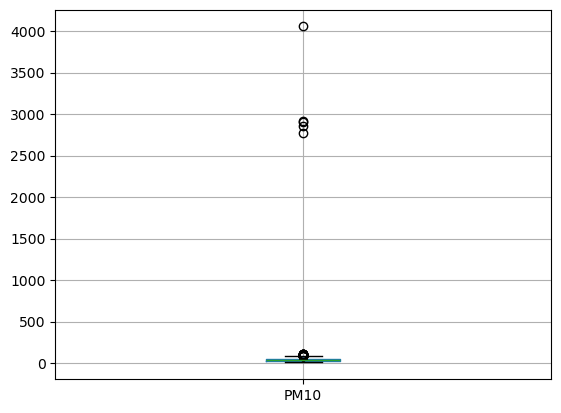

In [73]:
#2.B
data_rama.boxplot(column='PM10')

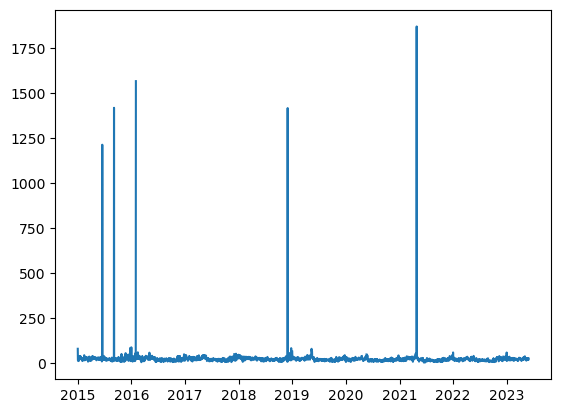

In [74]:
#2. A. GRAFICAMOS PM25
plt.plot(data_rama.index, data_rama['PM25' ])
#2.B. SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2015,2016,2019,2021), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA

<Axes: >

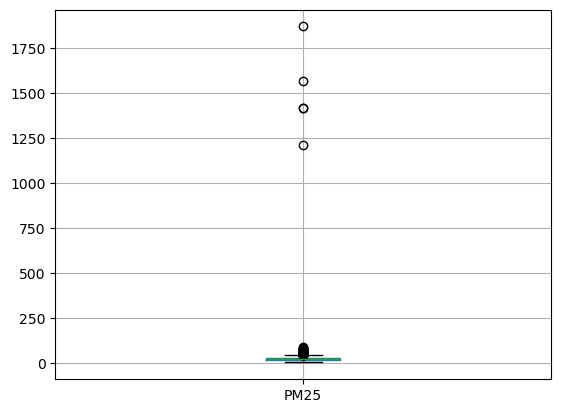

In [75]:
#2.B
data_rama.boxplot(column='PM25')

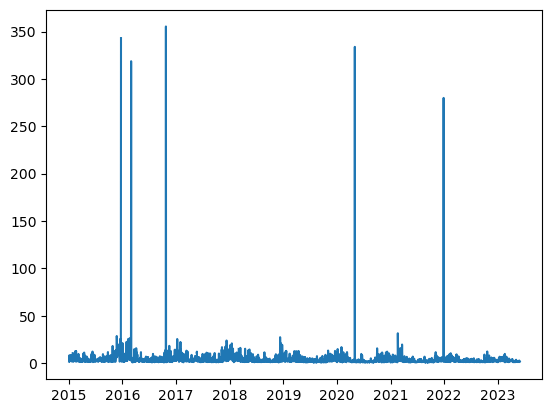

In [76]:
#2. A. GRAFICAMOS SO2
plt.plot(data_rama.index, data_rama['SO2' ])
#2.B. SE OBSERVAN DATOS ATÍPICOS YA QUE, FORMAN UNA DISTORSIÓN PARECIDA A TORRES (2015,2016,2020,2021), ADEMÁS, NO REPRESENTAN VERDADERAMENTE LA TENDENCIA

<Axes: >

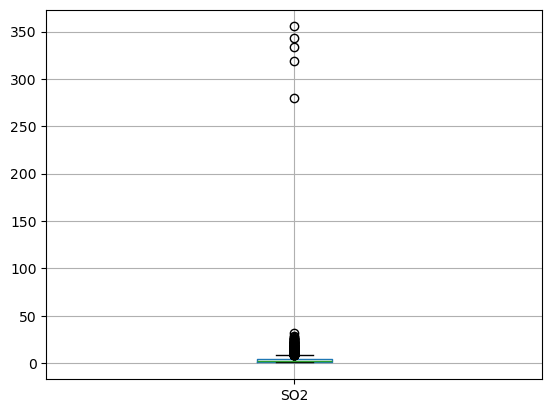

In [77]:
#2.B
data_rama.boxplot(column='SO2')

# 3. Manejo de datos atípicos


In [78]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#CO
Q1CO = data_rama['CO' ].quantile(0.25)
Q3CO= data_rama['CO' ].quantile(0.75)
IQRCO = Q1CO-Q3CO #PARA CALCULAR EL RANGO INTERCUÁNTILICO

limite_inferior = Q1CO - 1.5*IQRCO
limite_inferior
#DAYLI RATE PARA QUE SE CONSIDERE ATÍPICO ES 0.737

#Ahora hacemos lo de arriba y si es mayor es atípico
limite_superior = Q3CO + 1.5*IQRCO
limite_superior
 

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 2 es atípico
data_rama['CO' ].describe()

count    2916.000000
mean        0.546324
std         1.547938
min         0.115917
25%         0.328456
50%         0.446299
75%         0.601357
max        43.237677
Name: CO, dtype: float64

In [79]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#NO
Q1NO = data_rama['NO' ].quantile(0.25)
Q3NO= data_rama['NO' ].quantile(0.75)
IQRNO = Q1NO-Q3NO #PARA CALCULAR EL RANGO INTERCUÁNTILICO

limite_inferior = Q1NO - 1.5*IQRNO
limite_inferior 
#DAYLI RATE PARA QUE SE CONSIDERE ATÍPICO ES 25.09  y 2.408
#Ahora hacemos lo de arriba y si es mayor es atípico
limite_superior = Q3NO + 1.5*IQRNO
limite_superior 

 

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 30 es atípico
data_rama['NO' ].describe()

count    2918.000000
mean       16.865058
std        52.445837
min         1.168000
25%         8.071004
50%        12.719253
75%        19.396523
max      1423.223082
Name: NO, dtype: float64

In [80]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#NO2
Q1NO2 = data_rama['NO2' ].quantile(0.25)
Q3NO2= data_rama['NO2' ].quantile(0.75)
IQRNO2 = Q1NO2-Q3NO2 #PARA CALCULAR EL RANGO INTERCUÁNTILICO

limite_inferior = Q1NO2 - 1.5*IQRNO2
limite_inferior 
#DAYLI RATE PARA QUE SE CONSIDERE ATÍPICO ES 31.09  y 13.83
#Ahora hacemos lo de arriba y si es mayor es atípico
limite_superior = Q3NO2 + 1.5*IQRNO2
limite_superior 

 

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 40 es atípico
data_rama['NO2' ].describe()

count    2916.000000
mean       22.964047
std         6.738178
min         8.061630
25%        18.149000
50%        22.364633
75%        26.779887
max        72.193452
Name: NO2, dtype: float64

In [81]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#NOX
Q1NOX = data_rama['NOX' ].quantile(0.25)
Q3NOX= data_rama['NOX' ].quantile(0.75)
IQRNOX = Q1NOX-Q3NOX #PARA CALCULAR EL RANGO INTERCUÁNTILICO

limite_inferior = Q1NOX - 1.5*IQRNOX
limite_inferior 
#DAYLI RATE PARA QUE SE CONSIDERE ATÍPICO ES 56.65  y 17.127
#Ahora hacemos lo de arriba y si es mayor es atípico
limite_superior = Q3NOX + 1.5*IQRNOX
limite_superior 

 

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 75 es atípico
data_rama['NOX' ].describe()

count    2931.000000
mean       38.081554
std        14.808493
min         9.983402
25%        27.008633
50%        35.902381
75%        46.770094
max       148.005952
Name: NOX, dtype: float64

In [82]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#O3
#LO HACEMOS DE FORMA GRÁFICA

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 55 es atípico
data_rama['O3' ].describe()

count    2916.000000
mean       30.462022
std         8.996061
min         3.226054
25%        23.912015
50%        29.850776
75%        36.147095
max        67.443750
Name: O3, dtype: float64

In [83]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#PM10
#LO HACEMOS DE FORMA GRÁFICA

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 150 es atípico
data_rama['PM10' ].describe()

count    2931.000000
mean       47.145281
std       128.824262
min         8.218487
25%        29.542437
50%        40.131720
75%        52.910175
max      4055.391025
Name: PM10, dtype: float64

In [84]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#PM25
#LO HACEMOS DE FORMA GRÁFICA

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 100 es atípico
data_rama['PM25' ].describe()

count    2928.000000
mean       23.809324
std        62.176052
min         2.849315
25%        15.307906
50%        20.526173
75%        26.207407
max      1868.719929
Name: PM25, dtype: float64

In [85]:
# 3.A. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan
#SO2
#LO HACEMOS DE FORMA GRÁFICA

#YO PROPONGO QUE TODO VALOR POR ENCIMA DE 20 es atípico
data_rama['SO2' ].describe()

count    2936.000000
mean        4.255579
std        13.793875
min         0.630435
25%         1.562846
50%         2.514104
75%         4.390534
max       355.378067
Name: SO2, dtype: float64

RESUMIENDO LAS CONDCIONES DE DATOS ATÍPICOS TENGO
CO > 2
NO > 30
NO2 > 40
NOX > 75
O3 > 55
PM10 > 150
PM25 > 100
SO2 > 20

In [86]:
#CONTINUANDO CON 3
#3.A CREAREMOS LA CONDICIÓN DE SUSTITUCIÓN 
#CO
data_rama.loc[data_rama['CO' ] >2, 'CO'] = np.nan
data_rama['CO' ]
#NO
data_rama.loc[data_rama['NO' ] >30, 'NO'] = np.nan
data_rama['NO' ]
#NO2
data_rama.loc[data_rama['NO2' ] >40, 'NO2'] = np.nan
data_rama['NO2' ]
#NOX
data_rama.loc[data_rama['NOX' ] >75, 'NOX'] = np.nan
data_rama['NOX' ]
#O3
data_rama.loc[data_rama['O3' ] >55, 'O3'] = np.nan
data_rama['O3' ]
#PM10
data_rama.loc[data_rama['PM10' ] >150, 'PM10'] = np.nan
data_rama['PM10' ]
#PM25
data_rama.loc[data_rama['PM25' ] >100, 'PM25'] = np.nan
data_rama['PM25' ]
#SO2
data_rama.loc[data_rama['SO2' ] >20, 'SO2'] = np.nan
data_rama['SO2' ]

fecha
2015-01-01    11.554723
2015-01-02          NaN
2015-01-03     1.436937
2015-01-04     1.809061
2015-01-05     8.315789
                ...    
2023-05-27     2.735683
2023-05-28     2.331658
2023-05-29     1.071588
2023-05-30     1.181818
2023-05-31     1.402083
Name: SO2, Length: 3073, dtype: float64

Primeras filas del DataFrame filtrado:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585        NaN  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976        NaN  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   

                 PM25        SO2  
fecha                             
2015-01-01  78.953405  11.554723  
2015-01-02  15.449438        NaN  
2015-01-03  12.915129   1.436937  
2015-01-04  16.838284   1.809061  
2015-01-05        NaN   8.315789  


<Figure size 1200x600 with 0 Axes>

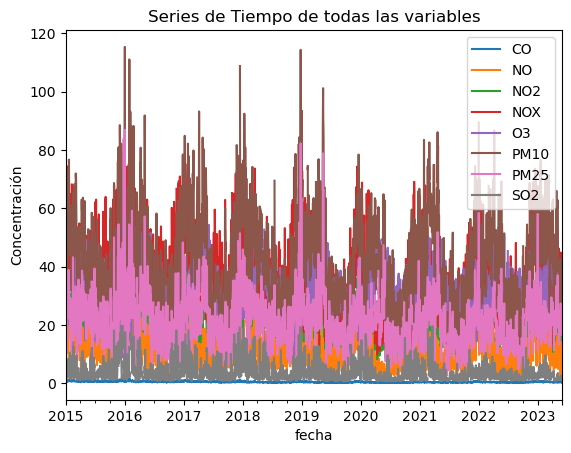


Número de valores nulos antes de la imputación:
CO      162
NO      351
NO2     210
NOX     196
O3      174
PM10    147
PM25    150
SO2     162
dtype: int64

Primeras filas del DataFrame después de la imputación y adición de columnas:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585  26.349761  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976  47.693988  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   

                 PM25        SO2  
fecha                             
2015-01-01  78.953405  11.554723  
2015-01-02  15.449438   2.510632  
2015-01-03  12.915129   1.436937  
2015-01-04  16.838284   1.80

<Figure size 1200x600 with 0 Axes>

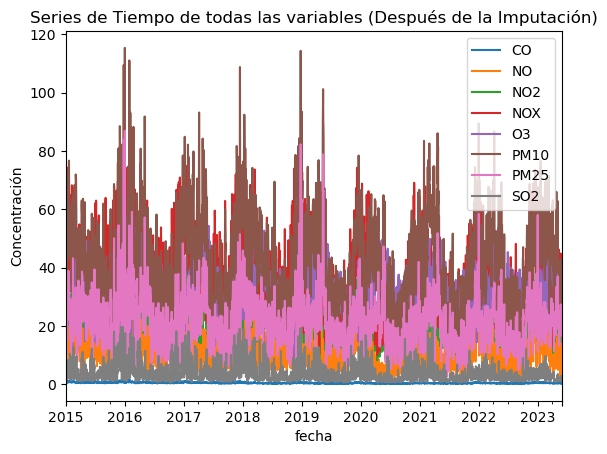

In [87]:
#3.B. VAMOS A BUSCAR LOS DATOS NULOS UTILIZANDO ALGUNO DE LOS MÉTODOS
#UTILIZAREMOS KNN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
data_impute = data_rama[['CO','NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']].loc['2015-01-01':'2023-05-31'] #Definimos las variables que nos interesa

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(data_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
data_impute.plot()
plt.title('Series de Tiempo de todas las variables')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(data_impute.isnull().sum())

# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
data_impute.loc[:, :] = imputer_knn.fit_transform(data_impute)

# Agregar una columna con el día juliano (día del año)
#df_impute['julian_day'] = df_impute.index.dayofyear

# Agregar una columna con la hora del día
#df_impute['hour'] = df_impute.index.hour

# Mostrar las primeras filas del DataFrame después de la imputación y adición de columnas
print("\nPrimeras filas del DataFrame después de la imputación y adición de columnas:")
print(data_impute.head())

# Contar y mostrar el número de valores nulos después de la imputación
print("\nNúmero de valores nulos después de la imputación:")
print(data_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después de la imputación
plt.figure(figsize=(12, 6))
data_impute[['CO','NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']].plot()
plt.title('Series de Tiempo de todas las variables (Después de la Imputación)')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()


In [88]:
data_impute.to_csv('RETOFILTRADO.csv', index=False)

# 4. ANÁLISIS DESCRIPTIVO DE LAS SERIES DE TIEMPO

<Figure size 1200x600 with 0 Axes>

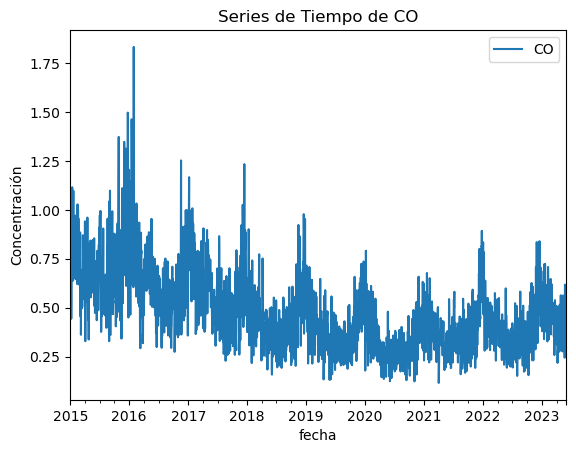

In [89]:
#CO
plt.figure(figsize=(12, 6))
data_impute[['CO']].plot()
plt.title('Series de Tiempo de CO')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

SE OBSERVA UN COMPORTAMIENTO NO ESTACIONAL, SE OBSERVA QUE DURANTE LA EPOCA DE PANDEMIA SE DISMINUYE LA CONCENTRACIÓN DE CO. A LO LARGO DEL AÑO, SE PRESENTA UN PATRÓN DE INCREMENTO EN LOS PRIMEROS Y ÚLTIMOS MESES DEL AÑO, SIENDO LA MITAD DE CADA AÑO EL MÍNIMO DE CONCENTRACIÓN.

<Figure size 1200x600 with 0 Axes>

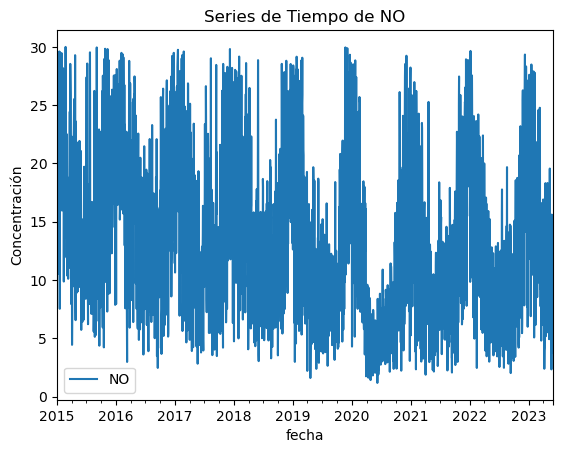

In [90]:
#NO
plt.figure(figsize=(12, 6))
data_impute[['NO']].plot()
plt.title('Series de Tiempo de NO')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

SE OBSERVA UNA SERIE CASI ESTACIONAL YA QUE SE REPITE UN PATRÓN A LO LARGO DE LOS AÑOS, SIN EMBARGO SE OBSERVA QUE A INICIOS DE LA PANDEMIA EN 2020 ES CUANDO SE TIENE EL MENOR NIVEL DE NO. A LO LARGO DE LOS AÑOS, SIEMPRE EN LOS PRIMEROS MESES LA CONCENTRACIÓN ES MÁXIMA.

<Figure size 1200x600 with 0 Axes>

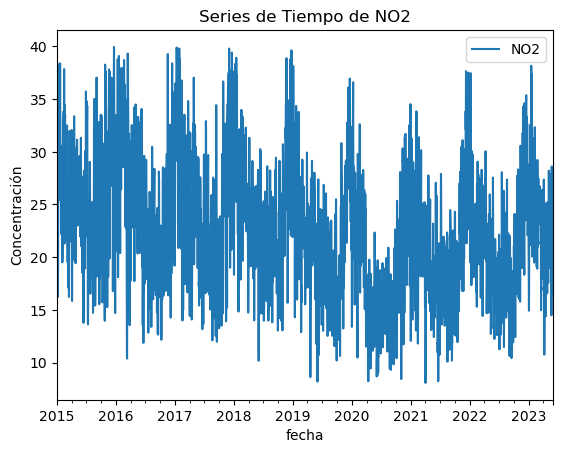

In [91]:
#NO2
plt.figure(figsize=(12, 6))
data_impute[[ 'NO2']].plot()
plt.title('Series de Tiempo de NO2')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()


HASTA EL 2019 SE TENÍA UN COMPORTAMIENTO ESTACIONARIO, SIENDO QUE EN LA ÉPOCA DE PANDEMIA SE NOTA UNA DISMINUCIÓN Y ES EN 2023 CUANDO VUELVE A RETOMAR SU ESTACIONALIDAD. 

<Figure size 1200x600 with 0 Axes>

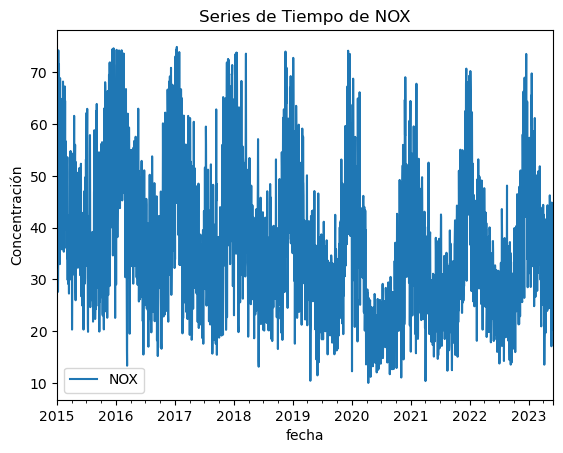

In [92]:
#NOX
plt.figure(figsize=(12, 6))
data_impute[[ 'NOX']].plot()
plt.title('Series de Tiempo de NOX')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

AL IGUAL QUE EL NO2, SE OBSERVA UN COMPORTAMIENTO ESTACIONARIO ANTES DE LA PANDEMIA, OBSERVÁNDOSE LOS PICOS DE ALTA CONCENTRACIÓN EN LOS PRIMEROS MESES DE CADA AÑO, ASÍ TAMBIÉN, SE OBSERVA QUE ES EN EL 2020 (AÑO PANDEMIA) DONDE SE TIENEN LOS VALORES MÁS BAJOS Y A LO LARGO DEL AÑO SON VALORES BAJOS EN COMPARACIÓN CON OTROS AÑOS. FINALMENTE EN 2023 LA ESTACIONALIDAD VUELVE A ESTABLECERSE

<Figure size 1200x600 with 0 Axes>

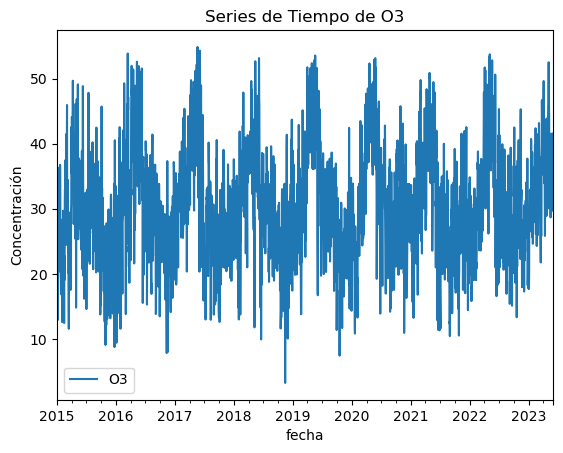

In [93]:
#O3
plt.figure(figsize=(12, 6))
data_impute[[ 'O3']].plot()
plt.title('Series de Tiempo de O3')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

SE OBSERVA ESTACIONALIDAD A LO LARGO DE LOS AÑOS, SÓLO ES EN EL 2020 DONDE SE NOTA UNA LIGERA DISMINUCIÓN (QUE NO PARECE TAN REPRESENTATIVA), ESTO AL MENOS REFLEJA QUE LA PANDEMIA NO INFLUYÓ DIRECTAMENTE A LA DISMINUCIÓN DE O3. SE OBSERVA EL COMPORTAMIENTO SIMILAR A LOS OTROS CONTAMINANTES, PRESENTÁNDOSE SUS  PICOS MÁXIMOS A PRINCIPIOS DE CADA AÑO.

<Figure size 1200x600 with 0 Axes>

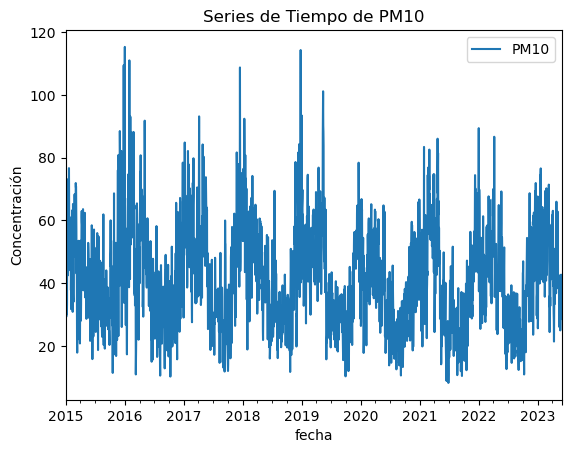

In [94]:
#PM10
plt.figure(figsize=(12, 6))
data_impute[[ 'PM10']].plot()
plt.title('Series de Tiempo de PM10')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

AL IGUAL QUE EL PM25, LA PANDEMIA PARECE NO HABER PROVOCADO CAMBIOS DRÁSTICOS COMO EN OTRO TIPOS DE CONTAMINANTES, ADEMÁS, SE OBSERVA CIERTO TIPO DE ESTACIONABILIDAD, ESTO PORQUE SON LOS PRIMEROS MESES DE CADA AÑO DONDE SE TIENEN LOS PICOS MÁS ALTOS; ESTE COMPROTAMIENTO SE HA REPETIDO EN TODOS LOS ELEMENTOS. 

<Figure size 1200x600 with 0 Axes>

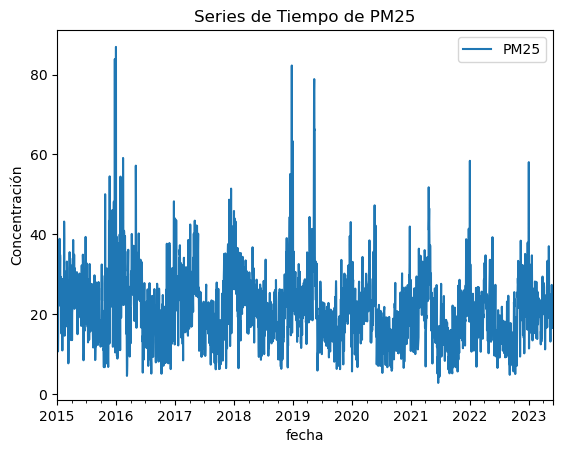

In [95]:
#PM25
plt.figure(figsize=(12, 6))
data_impute[[ 'PM25']].plot()
plt.title('Series de Tiempo de PM25')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

A PESAR DE LA DEPURACIÓN DE LOS DATOS ATÍPICOS AÚN SE OBSERVAN CIERTO NÚMERO DE ESTOS. NO SE PUEDE DECIR QUE ES UNA SERIE ESTACIONARIA Y TAMPOCO LA PANDEMIA FUE UN ELEMENTO IMPORTANTE PARA LA DISMINUCIÓN DE ESTE CONTAMINANTE.

<Figure size 1200x600 with 0 Axes>

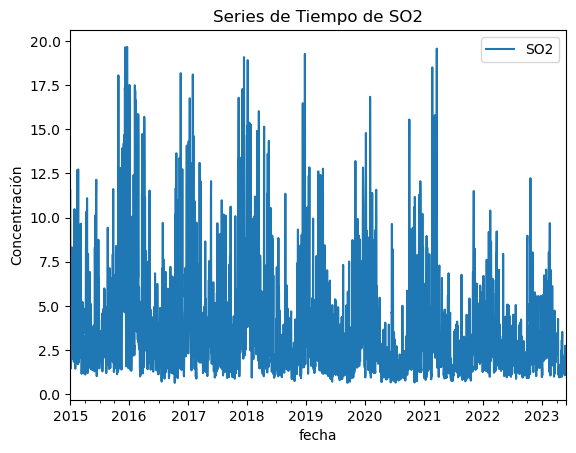

In [96]:
#SO2
plt.figure(figsize=(12, 6))
data_impute[['SO2']].plot()
plt.title('Series de Tiempo de SO2')
plt.xlabel('fecha')
plt.ylabel('Concentración')
plt.show()

SE PUEDE DECIR QUE SUS NIVELES MÍNIMOS SE MANTINENE CONSTANTES A LO LARGO DE LOS AÑOS, OBSERVÁNDOSE EN 2020 UNA DISMINUCIÓN PROVOCADO POR LA PANDEMIA Y QUIZÁS LA REDUCCIÓN DE ACTIVIDADES QUE EMITEN ESTE TIPO DE CONTAMINANTE. SE OBSERVA QUE LA PANDEMIA FUE UN ANTES Y UN DESPUÉS, YA QUE A PARTIR DE 2022 Y 2023 (DONDE LAS ACTIVIDADES VOLVIERON A LA NORMALIDAD) SE OBSERVA DISMINUCIÓN EN COMPARACIÓN DE AÑOS ANTERIORES.

# REDES NEURONALES

## PARA EL 5 MOVELO UNIVARIADO

ESCOGEREMOS LA VARIABLE CO Y VAMOS A UTILIZAR 60 DÍAS PARA PODER PREDECIR 7 DÍAS. UTILIZAREMOS EL MÉTODO RNN


In [97]:
#%pip install tensorflow

In [98]:
#Aquí yo requiero poder de cómputo 
#Dado que no contamos un equipo con ese poder, vamos a utilizar una herramienta de procesamiento en la nube
#ÉSTA SERÁ GOOGLE COLAB
#NOS REGISTRAMOS Y SUBIMOS NUESTRO CUADERNO DE NOTEBOOK

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense #Estos son las redes neuronales, Dense es para predecir (Capas Densamente conectada)
from tensorflow.keras import backend as K

In [99]:



def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2): #Los porcentajes de entrenamiento y de evaluación
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [100]:
# Paso 1: Leer el archivo CSV
file_path = 'RETOFILTRADO.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")

Tamaño de datos de entrenamiento: 2151
Tamaño de datos de prueba: 614
Tamaño de datos de evaluación: 308


In [101]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 60 #Aquí le digo que tome 24 horas anteriores para predecir 12 horas a futuro
future_steps = 7 #Estos son los datos o números de datos que quiero predecir en el futuro
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

Tamaño de X_train: (2085, 60, 1)
Tamaño de y_train: (2085, 7)
Tamaño de X_test: (548, 60, 1)
Tamaño de y_test: (548, 7)
Tamaño de X_eval: (242, 60, 1)
Tamaño de y_eval: (242, 7)


d:\PYTHON\Python\envs\Diplomado\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0663 - rmse: 0.2436 - val_loss: 0.0074 - val_rmse: 0.0859
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - rmse: 0.1004 - val_loss: 0.0055 - val_rmse: 0.0718
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0084 - rmse: 0.0914 - val_loss: 0.0044 - val_rmse: 0.0641
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - rmse: 0.0897 - val_loss: 0.0051 - val_rmse: 0.0683
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - rmse: 0.0866 - val_loss: 0.0040 - val_rmse: 0.0609
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0076 - rmse: 0.0870 - val_loss: 0.0040 - val_rmse: 0.0597
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - rmse: 0.0841 - val_loss: 0.0039 - val_rmse: 0.0589
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0071 - rmse: 0.0840 - val_loss: 0.0038 - val_rmse: 0.0585
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0

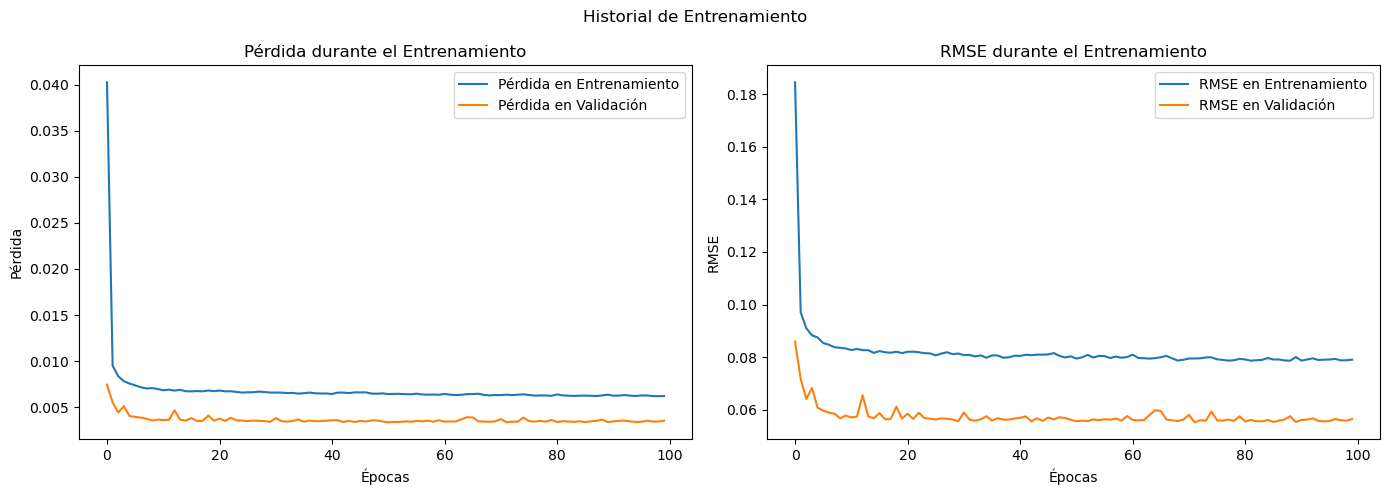

In [102]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


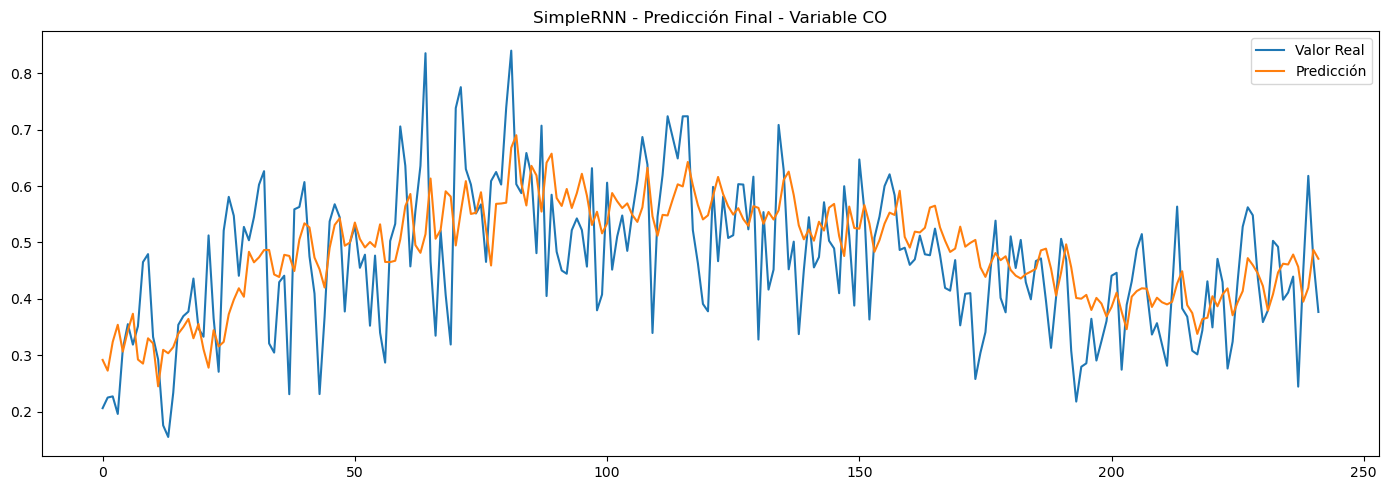

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


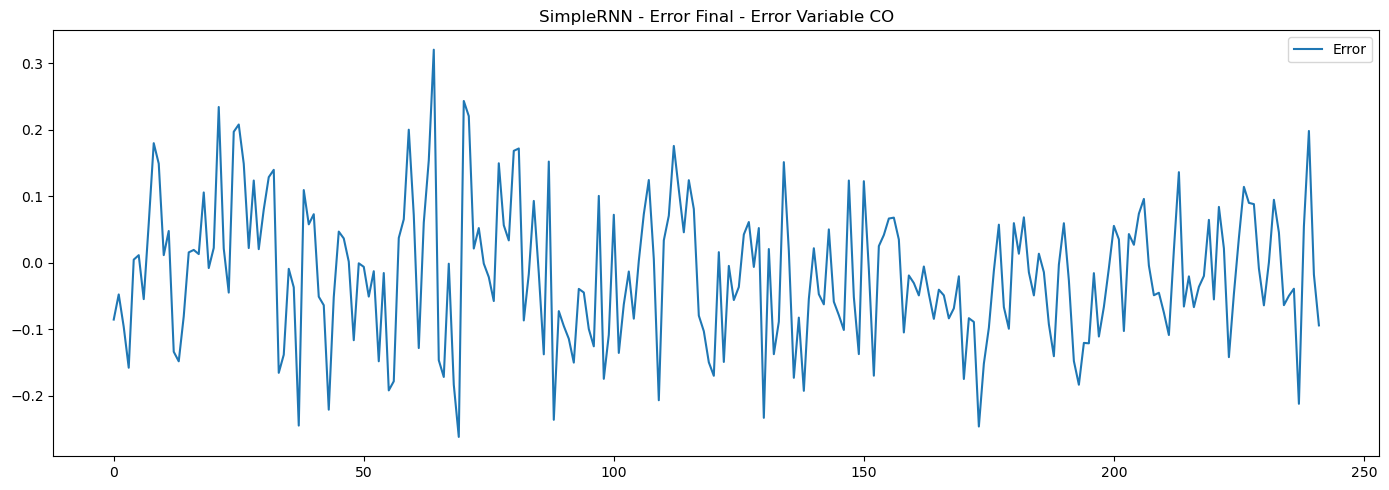

In [103]:
#VISUALIZAR PREDICCIONES Y ERRORES
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


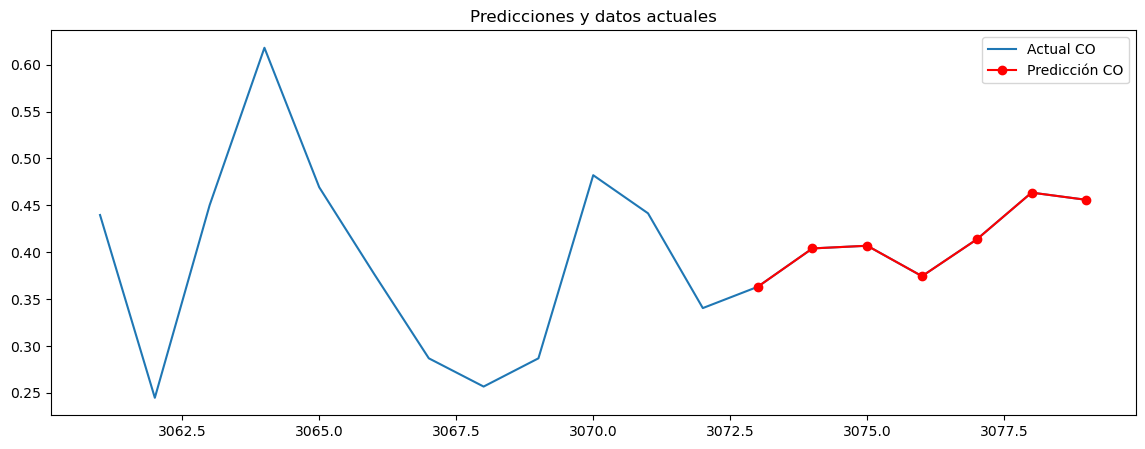

In [104]:
#VER SERIE DE TIEMPO CON  PREDICCIONES 
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.

    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.

    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}

    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])

    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)

    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)

    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)

    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)

    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)

    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.

    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')

    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

EL COMPORTAMIENTO PREDECIDO PARECIERA NO SEGUIR LA TENDENCIA DESCRITA POR LOS DATOS DE ENTRENAMIENTO. ESTO POR LOS PICOS OBSERVADOS EN LOS DATOS DE ENTRENAMIENTO, SIN EMBARGODE ACUERDO A LO PREDICHO, LA TENDENCIA SERÁ AL ALZA. 

# 5. PARA EL MODELO MULTIVARIADO

ESCOGEREMOS CO, NO, NO2 Y NOX PARA PREDECIR CO. UTILIZAREMOS 60 DÍAS PARA PREDECIR 7 


In [105]:
def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2): #Los porcentajes de entrenamiento y de evaluación
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [106]:
# Paso 1: Leer el archivo CSV
file_path = 'RETOFILTRADO.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")

Tamaño de datos de entrenamiento: 2151
Tamaño de datos de prueba: 614
Tamaño de datos de evaluación: 308


In [111]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 60 #Aquí le digo que tome 24 horas anteriores para predecir 12 horas a futuro
future_steps = 7 #Estos son los datos o números de datos que quiero predecir en el futuro
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM25', 'SO2']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

Tamaño de X_train: (2085, 60, 7)
Tamaño de y_train: (2085, 7)
Tamaño de X_test: (548, 60, 7)
Tamaño de y_test: (548, 7)
Tamaño de X_eval: (242, 60, 7)
Tamaño de y_eval: (242, 7)


Epoch 1/100


d:\PYTHON\Python\envs\Diplomado\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0482 - rmse: 0.2100 - val_loss: 0.0115 - val_rmse: 0.1053
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - rmse: 0.1283 - val_loss: 0.0088 - val_rmse: 0.0919
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - rmse: 0.1142 - val_loss: 0.0077 - val_rmse: 0.0856
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - rmse: 0.1054 - val_loss: 0.0062 - val_rmse: 0.0769
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - rmse: 0.0996 - val_loss: 0.0050 - val_rmse: 0.0680
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - rmse: 0.0965 - val_loss: 0.0048 - val_rmse: 0.0664
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - rmse: 0.0916 - val_loss: 0.0045 - val_rmse: 0.0635
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - rmse: 0.0900 - val_loss: 0.0042 - val_rmse: 0.0614
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 

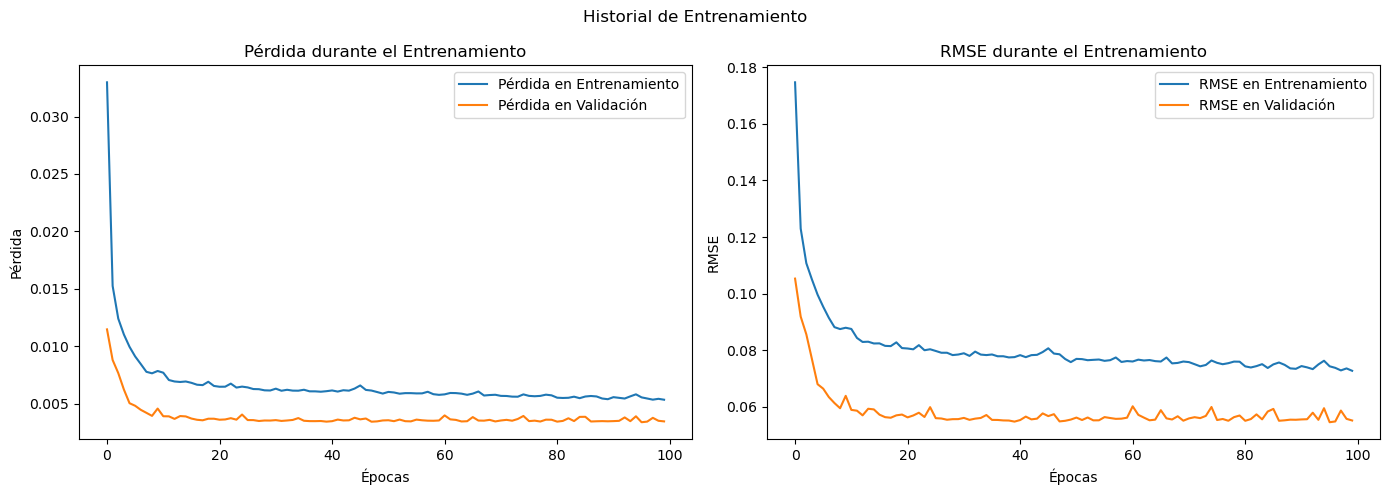

In [112]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


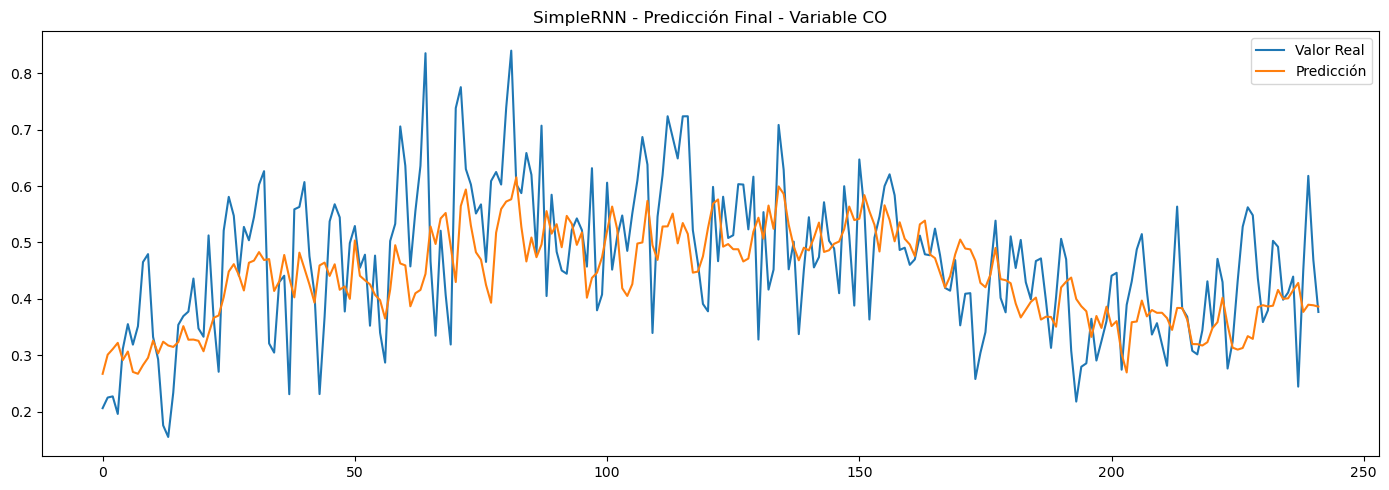

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


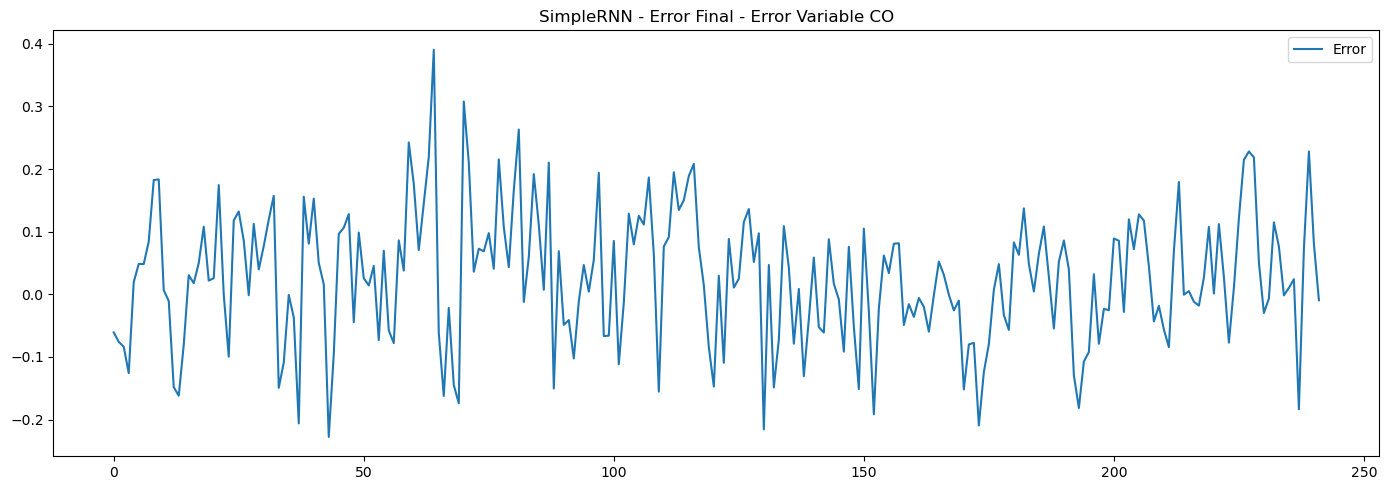

In [113]:
#VISUALIZAR PREDICCIONES Y ERRORES
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


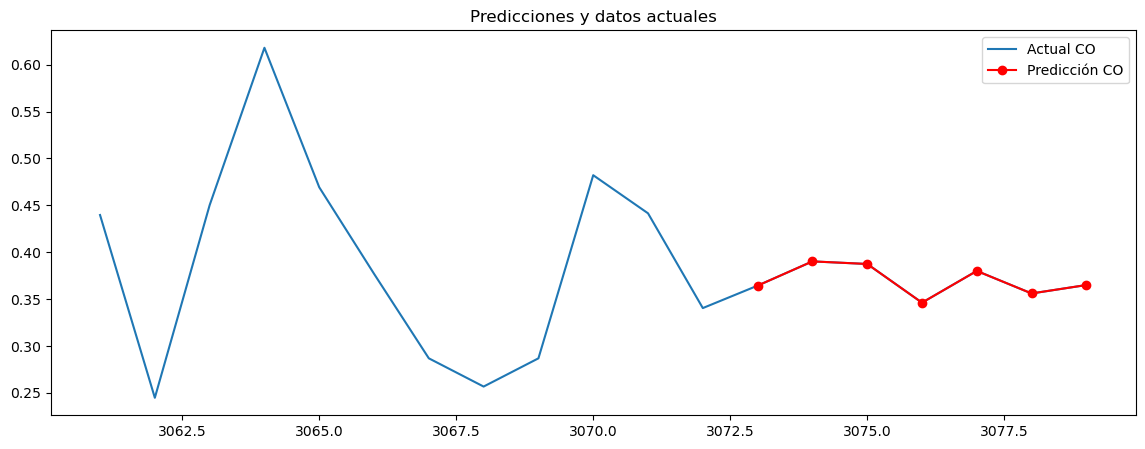

In [114]:
#VER SERIE DE TIEMPO CON  PREDICCIONES 
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.

    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.

    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}

    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])

    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)

    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)

    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)

    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)

    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)

    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.

    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')

    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

SE PBSERVA UN COMPORTAMIENTO MÁS SIMILAR A LO OBSERVADO EN LOS DATOS ANTERIORES, PRESENTÁNDOSE PICOS Y UNA TENDENCIA CRECIENTE, PERO NO TAN ABRUPTA. PUEDE DECIRSE QUE AL UTILIZAR MÁS VARIABLES, SE OBTIENE UN RESULTADO MÁS FIABLES